# 결정 트리
## 로지스틱 회귀로 와인 분류하기

In [ ]:
import pandas as pd # pandas 라이브러리 불러오기

wine = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/wine.csv')

In [ ]:
wine.head() # 데이터프레임의 처음 5개 행을 출력합니다.

alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0

In [4]:
wine.info() # 데이터 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
wine.describe() # 데이터 요약 정보 출력

alcohol        sugar           pH        class
count  6497.000000  6497.000000  6497.000000  6497.000000
mean     10.491801     5.443235     3.218501     0.753886
std       1.192712     4.757804     0.160787     0.430779
min       8.000000     0.600000     2.720000     0.000000
25%       9.500000     1.800000     3.110000     1.000000
50%      10.300000     3.000000     3.210000     1.000000
75%      11.300000     8.100000     3.320000     1.000000
max      14.900000    65.800000     4.010000     1.000000

In [ ]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()  # 'alcohol', 'sugar', 'pH' 열을 NumPy 배열로 변환하여 data 변수에 저장
target = wine['class'].to_numpy()   # 'class' 열을 NumPy 배열로 변환하여 target 변수에 저장

In [ ]:
from sklearn.model_selection import train_test_split    # train_test_split 함수를 불러옵니다.
# 데이터를 훈련 세트와 테스트 세트로 분할합니다.

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [ ]:
print(train_input.shape, test_input.shape) # 훈련 세트와 테스트 세트의 크기를 출력합니다.

(5197, 3) (1300, 3)


In [ ]:
from sklearn.preprocessing import StandardScaler # StandardScaler 클래스를 불러옵니다.

ss = StandardScaler()   # StandardScaler 객체를 생성합니다.
ss.fit(train_input) # 훈련 세트에 맞춰 스케일러를 학습시킵니다.
# 훈련 세트에 맞춰 스케일러를 학습시킵니다.

train_scaled = ss.transform(train_input) # 훈련 세트를 스케일링합니다.
test_scaled = ss.transform(test_input) # 테스트 세트를 스케일링합니다.

In [ ]:
from sklearn.linear_model import LogisticRegression # LogisticRegression 클래스를 불러옵니다.

lr = LogisticRegression()    # 로지스틱 회귀 모델 객체를 생성합니다.
lr.fit(train_scaled, train_target) # 훈련 세트로 모델을 학습시킵니다.

print(lr.score(train_scaled, train_target)) # 훈련 세트에 대한 정확도를 출력합니다.
print(lr.score(test_scaled, test_target)) # 테스트 세트에 대한 정확도를 출력합니다.

0.7808350971714451
0.7776923076923077


## 설명하기 쉬운 모델과 어려운 모델

In [ ]:
print(lr.coef_, lr.intercept_) # 모델의 계수와 절편을 출력합니다.

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


## 결정 트리

In [ ]:
from sklearn.tree import DecisionTreeClassifier # DecisionTreeClassifier 클래스를 불러옵니다.

dt = DecisionTreeClassifier(random_state=42) # 결정 트리 분류기 객체를 생성합니다.
dt.fit(train_scaled, train_target) # 훈련 세트로 모델을 학습시킵니다.

print(dt.score(train_scaled, train_target)) # 훈련 세트에 대한 정확도를 출력합니다.
print(dt.score(test_scaled, test_target)) # 테스트 세트에 대한 정확도를 출력합니다.

0.996921300750433
0.8592307692307692


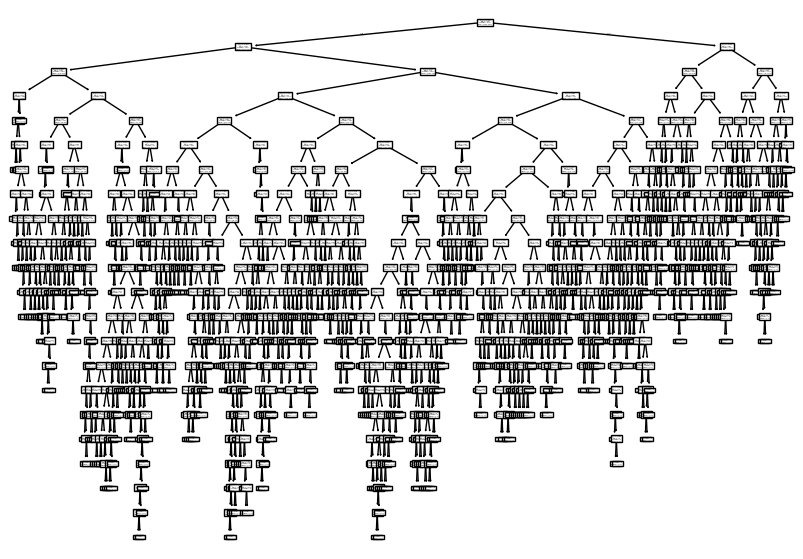

In [ ]:
import matplotlib.pyplot as plt # matplotlib.pyplot 라이브러리를 불러옵니다.
from sklearn.tree import plot_tree  # plot_tree 함수를 불러옵니다.

plt.figure(figsize=(10, 7)) # 그림의 크기를 설정합니다.
plot_tree(dt) # 결정 트리 모델을 시각화합니다.
plt.show() # 결정 트리 모델을 시각화합니다.

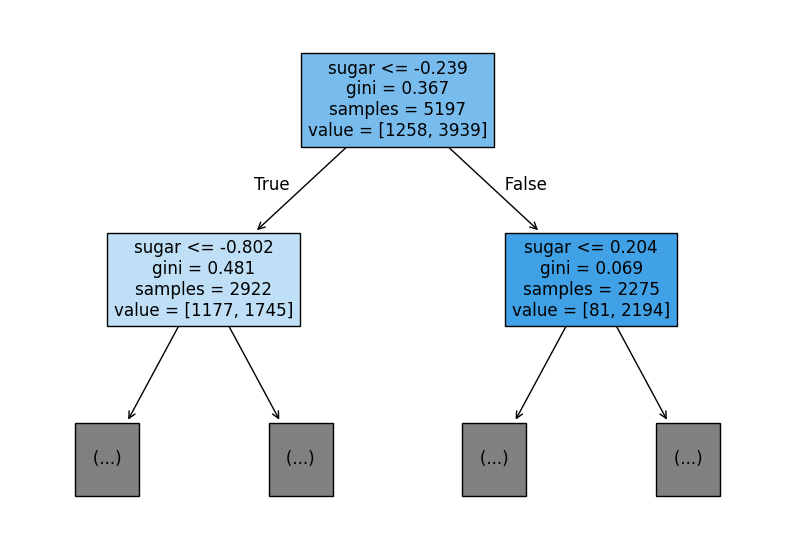

In [ ]:
import matplotlib.pyplot as plt     # matplotlib.pyplot 라이브러리를 불러옵니다.
from sklearn.tree import plot_tree # plot_tree 함수를 불러옵니다.

plt.figure(figsize=(10, 7)) # 그림의 크기를 설정합니다.
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH']) # 결정 트리 모델을 시각화합니다.
plt.show() # 결정 트리 모델을 시각화합니다.

## 가지치기

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42) # 최대 깊이를 3으로 설정한 결정 트리 분류기 객체를 생성합니다.
dt.fit(train_scaled, train_target) # 훈련 세트로 모델을 학습시킵니다.

print(dt.score(train_scaled, train_target)) # 훈련 세트에 대한 정확도를 출력합니다.
print(dt.score(test_scaled, test_target)) # 테스트 세트에 대한 정확도를 출력합니다.

0.8454877814123533
0.8415384615384616


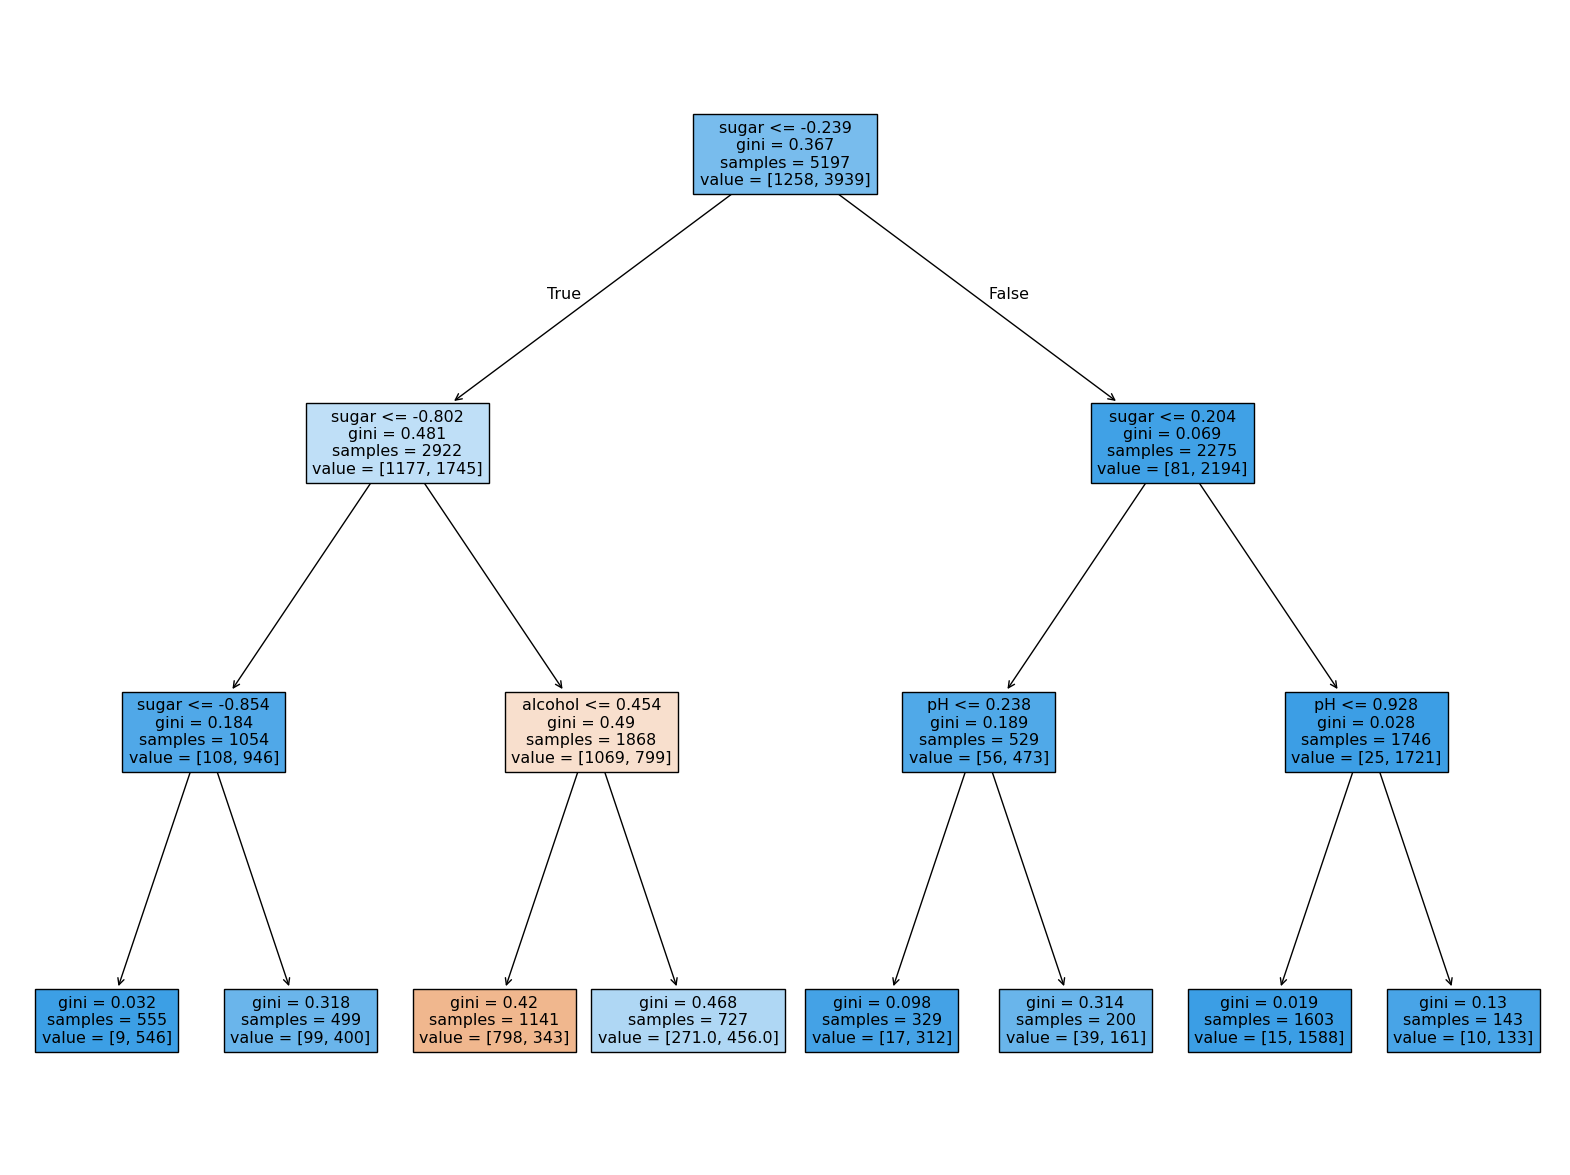

In [ ]:
plt.figure(figsize=(20,15)) # 그림의 크기를 설정합니다.
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH']) # 결정 트리 모델을 시각화합니다.
plt.show() # 결정 트리 모델을 시각화합니다.

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42) # 최대 깊이를 3으로 설정한 결정 트리 분류기 객체를 생성합니다.
dt.fit(train_input, train_target) # 훈련 세트로 모델을 학습시킵니다.

print(dt.score(train_input, train_target))  # 훈련 세트에 대한 정확도를 출력합니다.
print(dt.score(test_input, test_target))    # 테스트 세트에 대한 정확도를 출력합니다.

0.8454877814123533
0.8415384615384616


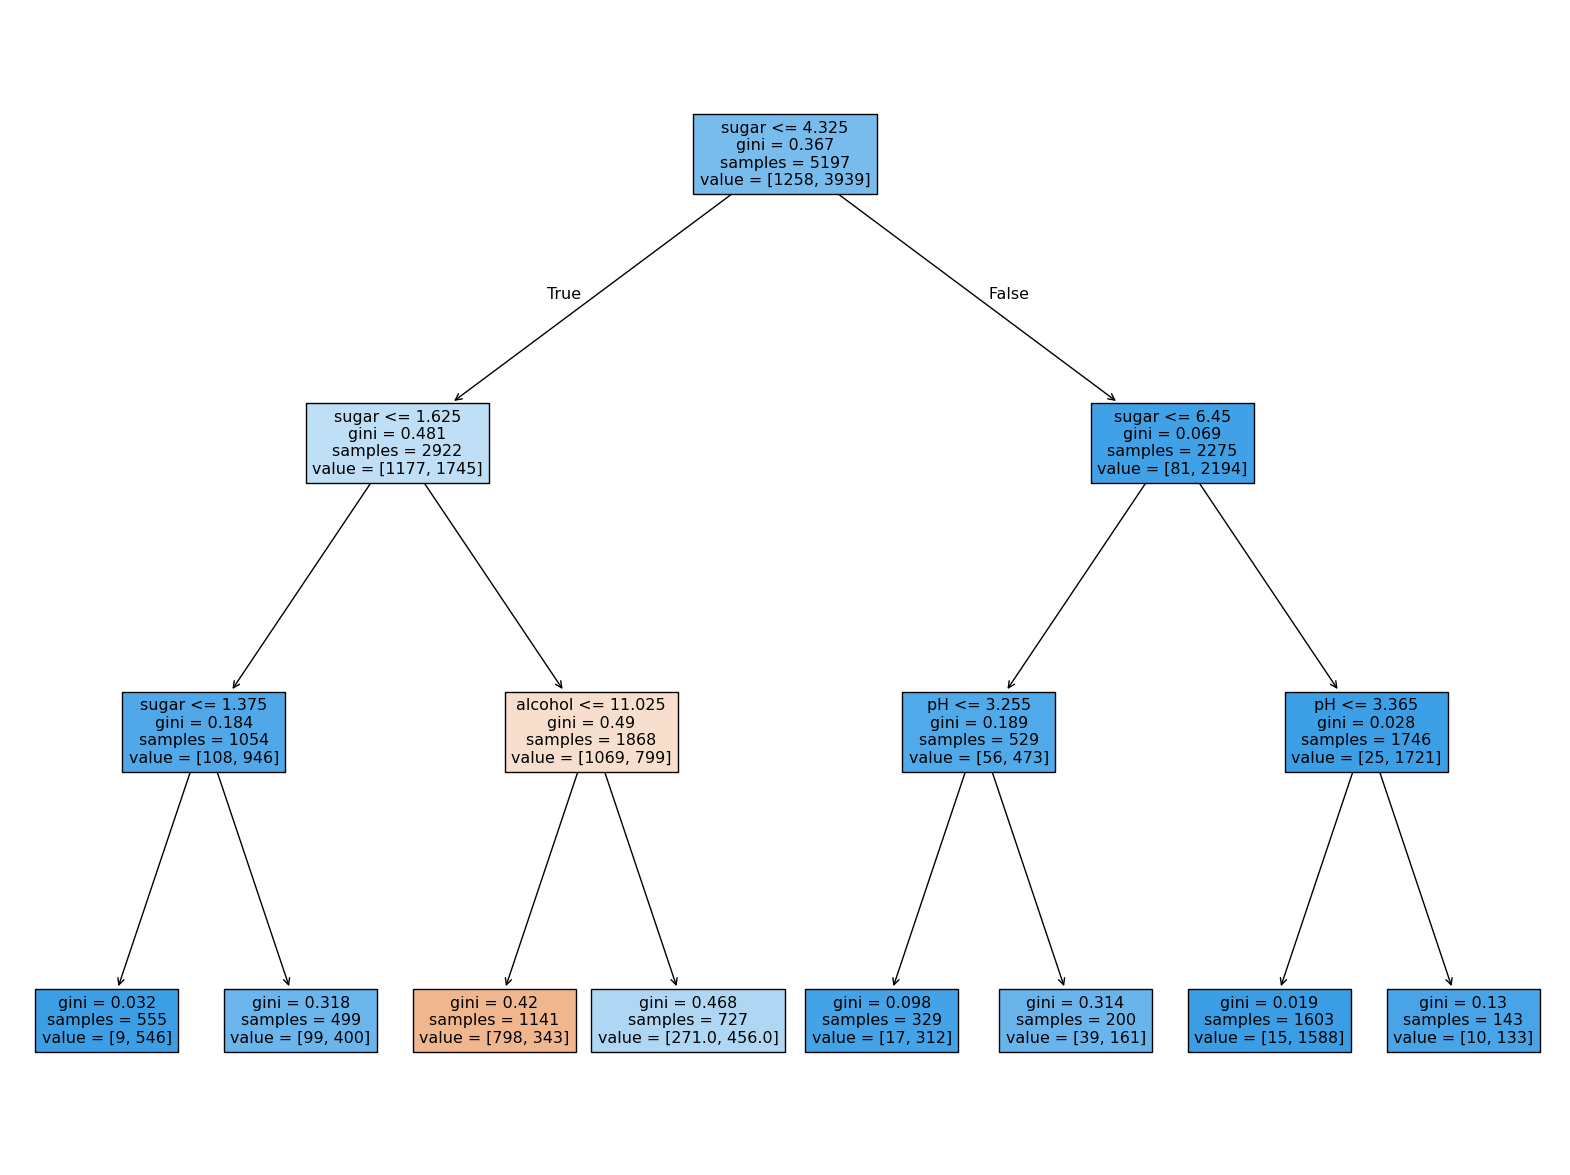

In [ ]:
plt.figure(figsize=(20,15)) # 그림의 크기를 설정합니다.
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH']) # 결정 트리 모델을 시각화합니다.
plt.show() # 결정 트리 모델을 시각화합니다.

In [ ]:
print(dt.feature_importances_) # 각 특성의 중요도를 출력합니다.

[0.12345626 0.86862934 0.0079144 ]


## 확인 문제

In [ ]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42) 
# 최소 불순도 감소를 0.0005로 설정한 결정 트리 분류기 객체를 생성합니다.
dt.fit(train_input, train_target) # 훈련 세트로 모델을 학습시킵니다.

print(dt.score(train_input, train_target))  # 훈련 세트에 대한 정확도를 출력합니다.
print(dt.score(test_input, test_target))   # 테스트 세트에 대한 정확도를 출력합니다.

0.8874350586877044
0.8615384615384616


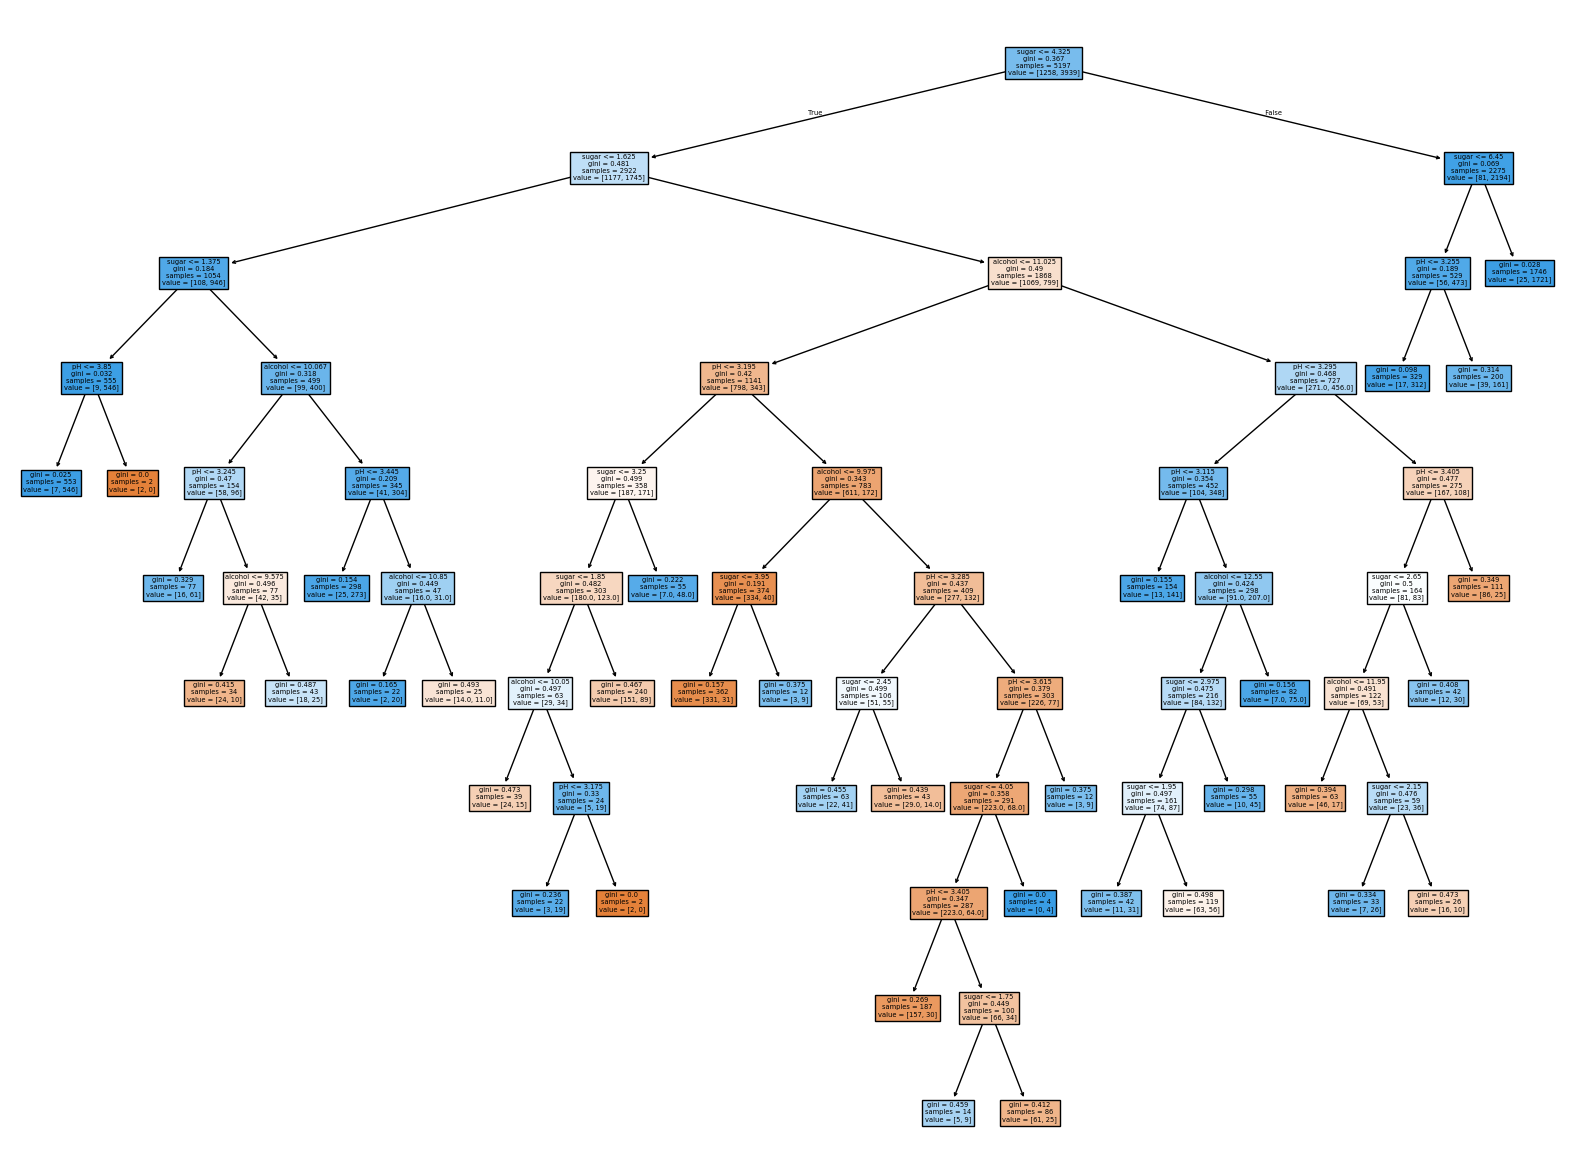

In [ ]:
plt.figure(figsize=(20,15)) # 그림의 크기를 설정합니다.
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH']) # 결정 트리 모델을 시각화합니다.
plt.show() # 결정 트리 모델을 시각화합니다.